#Basic exploratory data anlysis

In this notebook i will perform operations such as:
- Load the dataset
- Check basic data characteristics
- Check for missing and special values
- Check attributes distributions
- Check for attribute correlations

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
LOCAL_DATA_PATH = "../data/raw/gun-violence-data_01-2013_03-2018.csv"

Load the dataset

In [3]:
df = pd.read_csv(LOCAL_DATA_PATH)
df.shape

(239677, 29)

Basic data characteristics

In [10]:
df.head(30)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,1.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",36.2405,Fairmont Terrace,-95.9768,NaN,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed

In [8]:
df.tail()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,NaN,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,NaN,NaN,1.0,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,4.0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,Shop Rite,-93.0836,1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,2.0,0::Unknown,0::Unknown,Shot - Wounded/Injured,29.9239,NaN,-90.0442,1.0,NaN,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,9.0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",29.7201,Vanderbilt Court apartments,-95.6110,1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0
239676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,2.0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Sui...",44.7293,NaN,-69.7691,2.0,"ALT: US 2, shot wife then self, handgun, shotg...",0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

Special and missing values

In [12]:
nominal_cols = df.select_dtypes(include=['object']).columns

#Check for unexpected values in states
for state in df['state'].unique():
    print(state)



Pennsylvania
California
Ohio
Colorado
North Carolina
Oklahoma
New Mexico
Louisiana
Maryland
Tennessee
Missouri
District of Columbia
Illinois
Delaware
Utah
Michigan
Georgia
Indiana
Mississippi
New York
Florida
Washington
South Carolina
Arizona
Kentucky
New Jersey
Virginia
Wisconsin
Rhode Island
Texas
Alabama
Kansas
Connecticut
West Virginia
Minnesota
Nevada
Nebraska
Massachusetts
Hawaii
New Hampshire
Iowa
Alaska
Arkansas
Idaho
Oregon
Wyoming
Maine
North Dakota
Montana
Vermont
South Dakota


In [13]:
#Check adresses that are null
df[df['address'].isnull()].head()


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
81,486605,2013-05-19,Michigan,Detroit,NaN,0,4,http://www.gunviolencearchive.org/incident/486605,http://detroit.cbslocal.com/tag/drive-by-shoot...,False,13.0,0::Unknown,0::Unknown,Shot - Wounded/Injured||Drive-by (car to stree...,42.3481,NaN,-83.0613,1.0,"ms; 4 inj. Drive by shooting. 1 critical, 3 se...",0::18||1::22||2::27||3::30,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://wjbk.dua1.worldnow.com/story/22293913/f...,6.0,1.0
88,487082,2013-05-29,Illinois,Chicago,NaN,0,4,http://www.gunviolencearchive.org/incident/487082,http://www.dnainfo.com/chicago/20130521/bronze...,False,7.0,NaN,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8859,Austin,-87.6251,NaN,ms; 4 inj. Crowd gathered as drive by occurs. ...,0::19||1::18||2::17||3::14,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Female||2::Female||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,5.0,3.0
188,479747,2013-09-12,Tennessee,Crab Orchard,NaN,4,0,http://www.gunviolencearchive.org/incident/479747,http://www.wsmv.com/story/23415177/4-people-fo...,False,6.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",35.9576,NaN,-84.8407,NaN,NaN,0::22||1::17||2::17||3::16||4::26||5::25,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Male||2::Male||3::Male||4::Male|...,0::Danielle Jacobson||1::Steven Presley||2::Do...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.wsmv.com/story/23415177/4-people-fo...,25.0,15.0
255,495323,2013-11-30,Michigan,Lansing,NaN,0,5,http://www.gunviolencearchive.org/incident/495323,http://www.wilx.com/home/headlines/Police-5-Sh...,False,8.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,42.7326,NaN,-84.5557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.wilx.com/home/headlines/Police-5-Sh...,68.0,23.0
257,972570,2013-12-01,Pennsylvania,Derry,NaN,1,0,http://www.gunviolencearchive.org/incident/972570,http://wccsradio.com/whitfield-denied-motion-f...,False,NaN,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Dom...",NaN,NaN,NaN,1.0,suspect shot exGF in her home,0::36||1::51,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Holly Slone George||1::Arthur Whitfield,1::Significant others - current or former,0::Killed||1::Arrested,0::Victim||1::Subject-Suspect,http://wccsradio.com/whitfield-denied-motion-f...,NaN,NaN


Attributes basic statistics

In [10]:
df.describe(include='all')

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
count,2.396770e+05,239677,239677,239677,223180,239677.000000,239677.000000,239677,239209,239677,227733.000000,140179,140226,239351,231754.000000,42089,231754.000000,140226.000000,158660,147379,197558,203315,117424,15774,212051,214814,239068,200905.000000,207342.00000
unique,NaN,1725,51,12898,198037,NaN,NaN,239677,213989,1,NaN,349,2502,18126,NaN,27595,NaN,NaN,136652,18951,898,873,113488,284,2150,259,217280,NaN,NaN
top,NaN,2017-01-01,Illinois,Chicago,2375 International Pkwy,NaN,NaN,http://www.gunviolencearchive.org/incident/108...,http://blog.tsa.gov,False,NaN,0::Unknown,0::Unknown,Shot - Wounded/Injured,NaN,Austin,NaN,NaN,man shot,0::24,0::Adult 18+,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,http://blog.tsa.gov,NaN,NaN
freq,NaN,342,17556,10814,160,NaN,NaN,1,1092,239677,NaN,121310,93559,47541,NaN,240,NaN,NaN,501,3814,94671,93496,144,2651,42293,58564,1092,NaN,NaN
mean,5.593343e+05,NaN,NaN,NaN,NaN,0.252290,0.494007,NaN,NaN,NaN,8.001265,NaN,NaN,NaN,37.546598,NaN,-89.338348,1.372442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.447132,20.47711
std,2.931287e+05,NaN,NaN,NaN,NaN,0.521779,0.729952,NaN,NaN,NaN,8.480835,NaN,NaN,NaN,5.130763,NaN,14.359546,4.678202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.048117,14.20456
min,9.211400e+04,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,19.111400,NaN,-171.429000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000
25%,3.085450e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,33.903400,NaN,-94.158725,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,9.00000
50%,5.435870e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,38.570600,NaN,-86.249600,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,19.00000
75%,8.172280e+05,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.437375,NaN,-80.048625,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,30.00000


In [6]:
df.shape[0] - df['incident_id'].nunique()

0

Attributes distribution

##Months


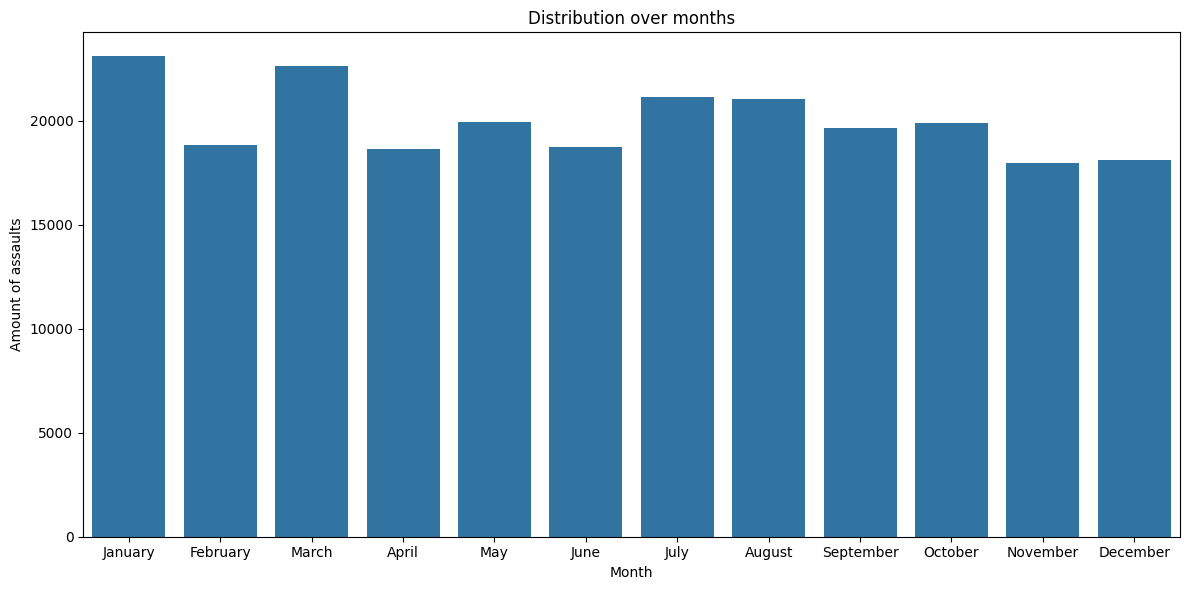

In [18]:
#Assults distribution over months of their occurance
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
sns.countplot(df, x='month', order=month_order)
plt.title("Distribution over months")
plt.xlabel("Month")
plt.ylabel("Amount of assaults")
plt.tight_layout()
plt.show()